<h1>–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏<a class="tocSkip"></h1>
   
<h2>–ö—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ<a class="tocSkip"></h2>

–ö–æ–º–ø–∞–Ω–∏—è ¬´–ß—ë—Ç–µ–Ω—å–∫–æ–µ —Ç–∞–∫—Å–∏¬ª —Å–æ–±—Ä–∞–ª–∞ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –æ –∑–∞–∫–∞–∑–∞—Ö —Ç–∞–∫—Å–∏ –≤ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞—Ö. –ß—Ç–æ–±—ã –ø—Ä–∏–≤–ª–µ–∫–∞—Ç—å –±–æ–ª—å—à–µ –≤–æ–¥–∏—Ç–µ–ª–µ–π –≤ –ø–µ—Ä–∏–æ–¥ –ø–∏–∫–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏, –Ω—É–∂–Ω–æ —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π —á–∞—Å.
    
<h2>–¶–µ–ª—å –ø—Ä–æ–µ–∫—Ç–∞<a class="tocSkip"></h2>
    
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è —Ç–∞–∫–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.
–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ RMSE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –Ω–µ –±–æ–ª—å—à–µ `48`.
    
<h2>–ö—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã<a class="tocSkip"></h2> 
  
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ —Å—Ç–æ–ª–±—Ü–µ `num_orders` (–æ—Ç –∞–Ω–≥–ª. number of orders, ¬´—á–∏—Å–ª–æ –∑–∞–∫–∞–∑–æ–≤¬ª).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏
from sklearn.model_selection import train_test_split

# –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è –∞–≤—Ç–æ–ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –º–æ–¥–µ–ª–∏
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb  # XGBoost –º–æ–¥–µ–ª—å
import lightgbm as lgb  # LightGBM –º–æ–¥–µ–ª—å
import catboost as cb  # CatBoost –º–æ–¥–µ–ª—å
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer, make_column_transformer

# –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∏
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler 
)

from statsmodels.tsa.seasonal import seasonal_decompose

from time import time
from tqdm import tqdm

In [2]:
# –∫–æ–¥ —Ä–µ–≤—å—é–µ—Ä–∞, –ø—Ä–æ–≤–µ—Ä–≤–∫–∞ –≤–µ—Ä—Å–∏–∏ –±–∏–±–ª–∏–æ–µ—Ç–∫–∏
import sklearn
sklearn.__version__

'0.24.1'

In [3]:
#–ö–æ–Ω—Å—Ç–∞–Ω—Ç—ã
RANDOM_STATE = SEED = 42
TEST_SIZE = 0.1

# –§—É–Ω–∫—Ü–∏–∏, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –≤ –ø—Ä–æ–µ–∫—Ç–µ

In [4]:
#–§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –æ—Å–Ω–æ–≤–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É

def check_df (dataframes):
    for df in dataframes:
        df_name = [name for name, obj in globals().items() if obj is df][0]
        print(f'–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É {df_name}:')
        # –æ–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
        df.info()
        # –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
        display(df.describe())
        # –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫
        display(df.head())
        print()
        print(f'–í –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ {df_name}:')
        print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:\n{df.isna().sum()} \
        \n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: {df.duplicated().sum()}')
        print()

<h1>–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞" data-toc-modified-id="–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞</a></span></li><li><span><a href="#–ê–Ω–∞–ª–∏–∑" data-toc-modified-id="–ê–Ω–∞–ª–∏–∑-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>–ê–Ω–∞–ª–∏–∑</a></span></li><li><span><a href="#–û–±—É—á–µ–Ω–∏–µ" data-toc-modified-id="–û–±—É—á–µ–Ω–∏–µ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>–û–±—É—á–µ–Ω–∏–µ</a></span></li><li><span><a href="#–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ" data-toc-modified-id="–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ</a></span></li><li><span><a href="#–ß–µ–∫-–ª–∏—Å—Ç-–ø—Ä–æ–≤–µ—Ä–∫–∏" data-toc-modified-id="–ß–µ–∫-–ª–∏—Å—Ç-–ø—Ä–æ–≤–µ—Ä–∫–∏-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>–ß–µ–∫-–ª–∏—Å—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏</a></span></li></ul></div>

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞

**–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

In [5]:
taxi_data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'], index_col='datetime')

In [6]:
check_df([taxi_data])

–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É taxi_data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32


–í –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ taxi_data:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:
num_orders    0
dtype: int64         
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 26415



**–†–µ—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ**

In [7]:
taxi_final = taxi_data.resample('1H').sum()

**–í—ã–≤–æ–¥ –ø–æ —Ä–∞–∑–¥–µ–ª—É**

- –î–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –∑–∞ –ø—Ä–æ–º–µ–∂—É—Ç–æ–∫ –≤—Ä–µ–º–µ–Ω–∏ —Å `–º–∞—Ä—Ç–∞` –ø–æ `–∞–≤–≥—É—Å—Ç` 2018 –≥–æ–¥–∞
- –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –¥—É–±–ª–∏–∫–∞—Ç—ã –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç
- –†–µ—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–ª–∏ –ø–æ–µ–∑–¥–∫–∏ –ø–æ —á–∞—Å–∞–º.

## –ê–Ω–∞–ª–∏–∑

In [8]:
taxi_final.describe()

num_orders
count  4416.000000
mean     84.422781
std      45.023853
min       0.000000
25%      54.000000
50%      78.000000
75%     107.000000
max     462.000000

**–¢–∞–∫ –∫–∞–∫ –ø–µ—Ä–∏–æ–¥ –¥–∞–Ω–Ω—ã—Ö —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π, –ø–æ–ø—Ä–æ–±—É–µ–º –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–æ-—Ä–∞–∑–Ω–æ–º—É –¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞—è —Å–æ—Å—Ç–∞–≤–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞**

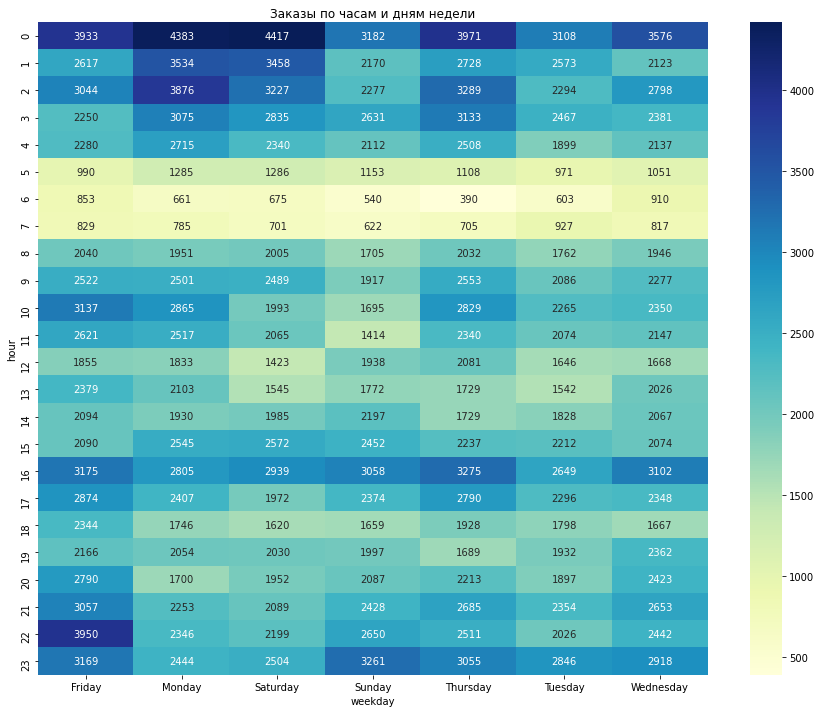

In [9]:
# –°–æ–∑–¥–∞–µ–º –∫–æ–ª–æ–Ω–∫–∏ —Å –¥–Ω–µ–º –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å–æ–º
taxi_final['hour'] = taxi_final.index.hour
taxi_final['weekday'] = taxi_final.index.day_name()

# –°—Ç—Ä–æ–∏–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É
pivot = taxi_final.pivot_table(index='hour', 
                                columns='weekday', 
                                values='num_orders',
                                aggfunc='sum')

plt.figure(figsize=(15, 12))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('–ó–∞–∫–∞–∑—ã –ø–æ —á–∞—Å–∞–º –∏ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏')
plt.show()

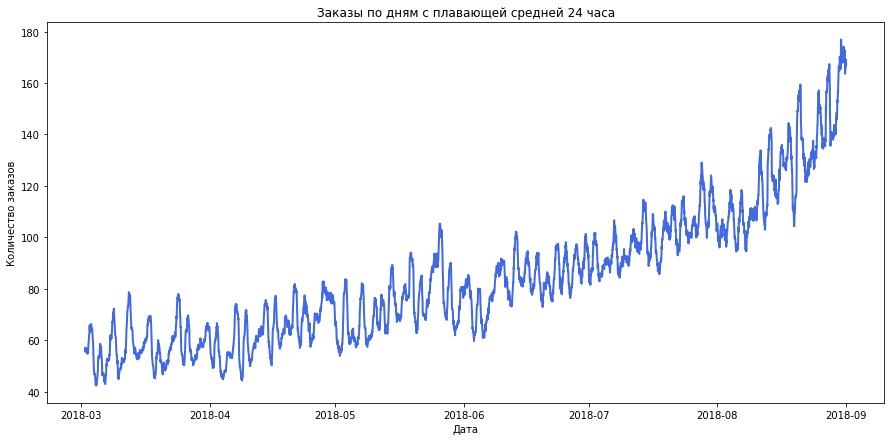

In [10]:
window_size = 24 
taxi_final_smoothed = taxi_final.rolling(window=window_size).mean()

plt.figure(figsize=(15, 7))
plt.plot(taxi_final_smoothed.index, taxi_final_smoothed['num_orders'], 
         linewidth=2, color='royalblue')
plt.title('–ó–∞–∫–∞–∑—ã –ø–æ –¥–Ω—è–º —Å –ø–ª–∞–≤–∞—é—â–µ–π —Å—Ä–µ–¥–Ω–µ–π 24 —á–∞—Å–∞')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤')
plt.show()

In [11]:
decomposed = seasonal_decompose(taxi_final.drop(columns=['weekday', 'hour']))

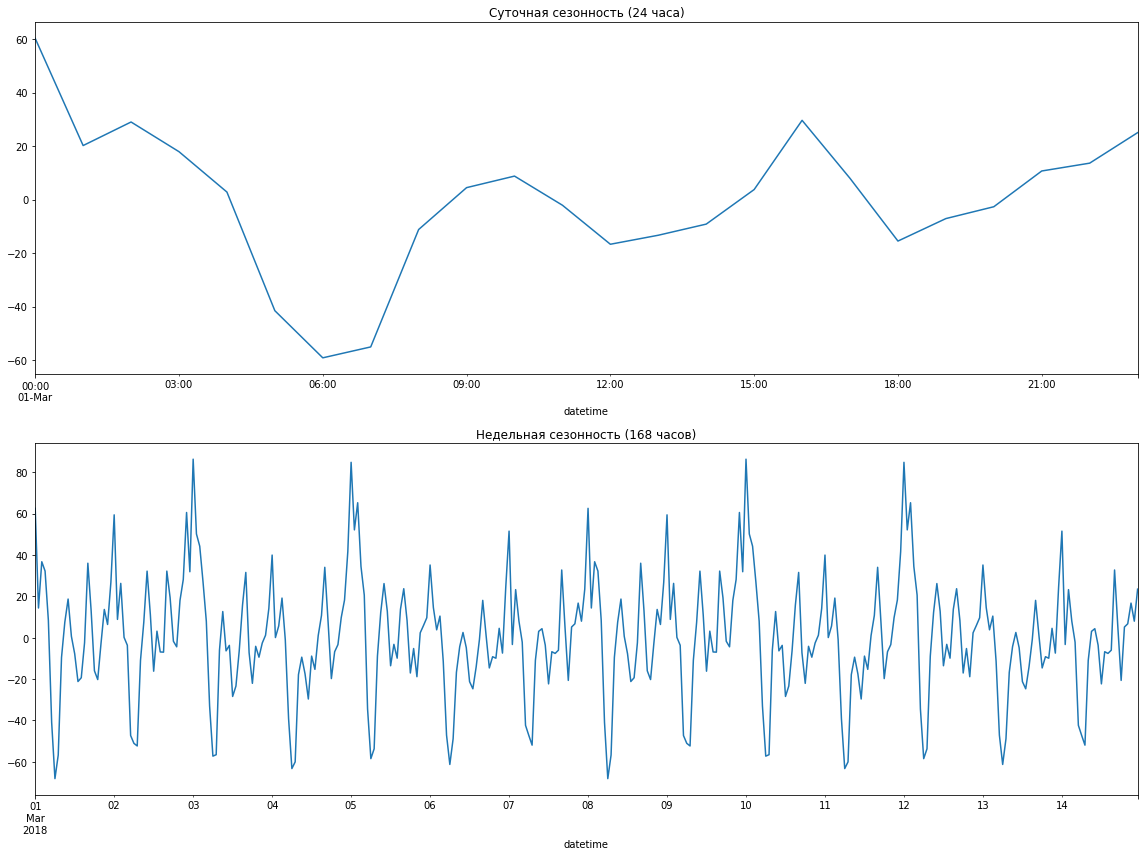

In [12]:
# –î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è —Å —Å—É—Ç–æ—á–Ω—ã–º –ø–µ—Ä–∏–æ–¥–æ–º (24 —á–∞—Å–∞)
decomposed_24h = seasonal_decompose(taxi_final.drop(columns=['weekday', 'hour']), period=24)

# –î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è —Å –Ω–µ–¥–µ–ª—å–Ω—ã–º –ø–µ—Ä–∏–æ–¥–æ–º (24*7 = 168 —á–∞—Å–æ–≤)
decomposed_168h = seasonal_decompose(taxi_final.drop(columns=['weekday', 'hour']), period=168)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(16, 12))

# –ì—Ä–∞—Ñ–∏–∫ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∑–∞ —Å—É—Ç–∫–∏ (24 —á–∞—Å–∞)
plt.subplot(2, 1, 1)
decomposed_24h.seasonal[:24].plot()  # –ü–µ—Ä–≤—ã–µ 24 —á–∞—Å–∞
plt.title('–°—É—Ç–æ—á–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (24 —á–∞—Å–∞)')

# –ì—Ä–∞—Ñ–∏–∫ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∑–∞ –Ω–µ–¥–µ–ª—é (168 —á–∞—Å–æ–≤)
plt.subplot(2, 1, 2)
decomposed_168h.seasonal[:336].plot()  # –ü–µ—Ä–≤—ã–µ 168 —á–∞—Å–æ–≤ (–Ω–µ–¥–µ–ª—è)
plt.title('–ù–µ–¥–µ–ª—å–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (168 —á–∞—Å–æ–≤)')

plt.tight_layout()
plt.show()

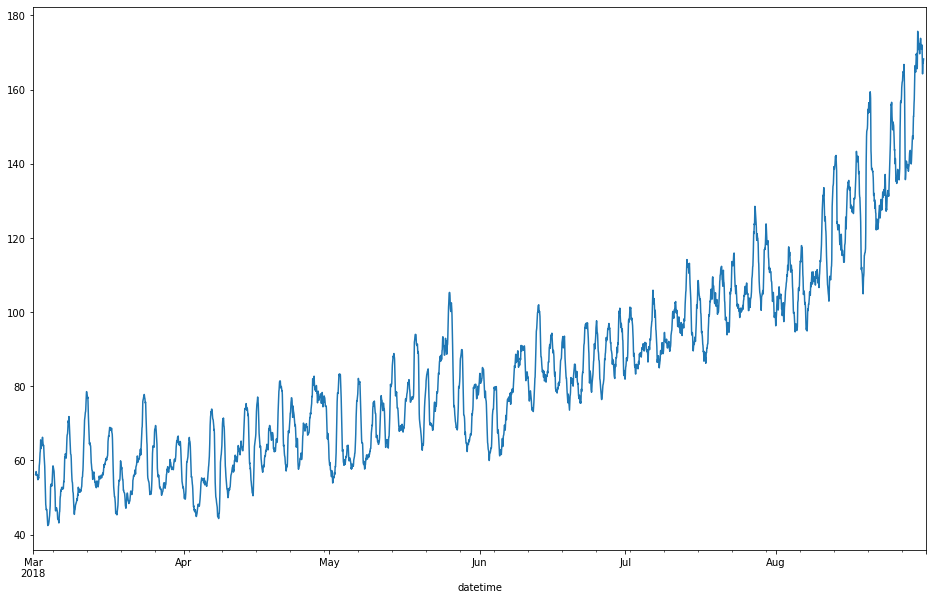

In [13]:
plt.figure(figsize=(16, 10))
decomposed.trend.plot()
plt.show()

- –ü–æ–ª—É—á–∏–ª–æ—Å—å —á—Ç–æ –≤ —Å—É—Ç–æ—á–Ω–æ–º –ø–µ—Ä–∏–æ–¥–µ –µ—Å—Ç—å –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å - –ó–∞–∫–∞–∑—ã –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —Ä–∞—Å—Ç—É—Ç –±–ª–∏–∂–µ –∫ –ø–æ–ª—É–Ω–æ—á–∏ –∏ —Å–Ω–∏–∂–∞—é—Ç—Å—è –∫ 6 —É—Ç—Ä–∞ –¥–æ –º–∏–Ω–∏–º—É–º–∞. –ï—â–µ –æ–¥–∏–Ω –ø–∏–∫ –∑–∞–∫–∞–∑–æ–≤ –æ–∫–æ–ª–æ 17:00 - –æ–∫–æ–Ω—á–∞–Ω–∏–µ —Ä–∞–±–æ—á–µ–≥–æ –¥–Ω—è
- –í –Ω–µ–¥–µ–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è —Å–∫–∞—á–∫–∏ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –Ω–∞ –≤–∏–∫—ç–Ω–¥–∞—Ö (—Å–±-–≤—Å) –∏ –ø–æ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫–∞–º, –∫–æ–≥–¥–∞ –ª—é–¥–∏ –ø–æ—Å–ª–µ –≤—ã—Ö–æ–¥–Ω—ã—Ö –≤–æ–∑–º–æ–∂–Ω–æ –æ–ø–∞–∑–¥—ã–≤–∞—é—Ç, –∏–∑-–∑–∞ —á–µ–≥–æ –±–µ—Ä—É—Ç —Ç–∞–∫—Å–∏
- –¢—Ä–µ–Ω–¥ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤–æ—Å—Ö–æ–¥—è—â–∏–π, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> üëç </div>

**–í—ã–≤–æ–¥ –ø–æ —Ä–∞–∑–¥–µ–ª—É**

- –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∑–∞–∫–∞–∑–æ–≤ 20 –∞–≤–≥—É—Å—Ç–∞ 2018 –≥–æ–¥–∞ `462` –∑–∞–∫–∞–∑–∞ –≤ 02:00
- –û–±—à–∏–π —Ç—Ä–µ–Ω–¥ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–∫–∞–∑–æ–≤ - –≤–æ—Å—Ö–æ–¥—è—â–∏–π, —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º - –∫–æ–º–ø–∞–Ω–∏—è —Ä–∞–∑–≤–∏–≤–∞–µ—Ç—Å—è –∏ –ø—Ä–∏–≤–ª–µ–∫–∞–µ—Ç –±–æ–ª—å—à–µ –∫–ª–∏–µ–Ω—Ç–æ–≤.
- –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∑–∞–∫–∞–∑–æ–≤ –Ω–æ—á—å—é –ø–æ `–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫–∞–º –∏ –≤—Ç–æ—Ä–Ω–∏–∫–∞–º`

## –û–±—É—á–µ–Ω–∏–µ

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data['weekday'] = data.index.weekday
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(taxi_final, 24, 168)    

In [15]:
taxi_final.sample()

num_orders  hour  weekday  lag_1  lag_2  lag_3  lag_4  \
datetime                                                                     
2018-07-04 13:00:00          80    13        2   85.0   80.0   83.0   96.0   

                     lag_5  lag_6  lag_7  ...  lag_16  lag_17  lag_18  lag_19  \
datetime                                  ...                                   
2018-07-04 13:00:00  104.0   31.0   30.0  ...    90.0    61.0    95.0    78.0   

                     lag_20  lag_21  lag_22  lag_23  lag_24  rolling_mean  
datetime                                                                   
2018-07-04 13:00:00   108.0   130.0    95.0    79.0    58.0     90.392857  

[1 rows x 28 columns]

In [16]:
ts = taxi_final['num_orders']

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


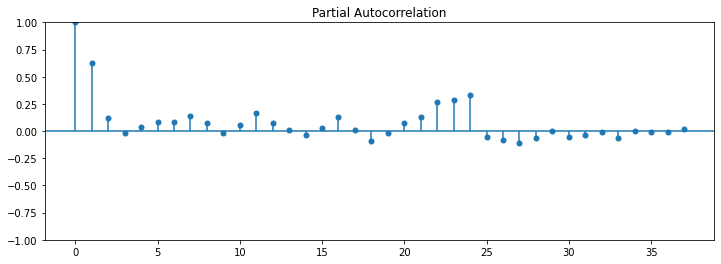

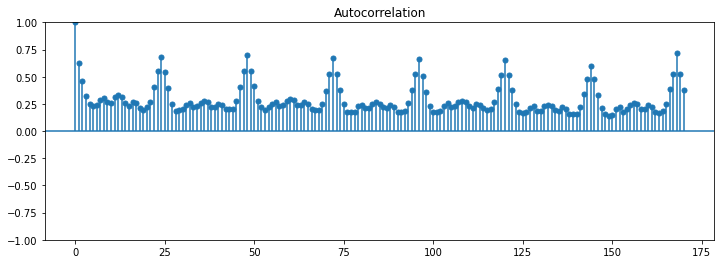

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(ts, alpha=None).set_size_inches(12, 4)
plt.show()

plot_acf(ts, lags=170, alpha=None).set_size_inches(12, 4)
plt.show()

**–ü–∏–∫ –ø—Ä–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –Ω–∞ 24 –∏ –Ω–µ–º–Ω–æ–≥–æ –ø—Ä–µ–≤—ã—à–∞—é—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞ 168 - —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–¥–∞–Ω–Ω—ã–µ —á–∞—Å–æ–≤—ã–µ, —Ç–æ —Å—É—Ç–æ—á–Ω–∞—è/–Ω–µ–¥–µ–ª—å–Ω–∞—è).**

In [18]:
train, test = train_test_split(taxi_final, shuffle=False, test_size=TEST_SIZE)
train = train.dropna()
test = test.dropna()

In [19]:
X_train = train.drop(columns=['num_orders'], axis=1)
y_train = train['num_orders']
X_test = test.drop(columns=['num_orders'], axis=1)
y_test = test['num_orders']

In [20]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 
                   'rolling_mean', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 
                   'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24']
categorical_features = ['hour', 'weekday']

In [21]:
# –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä
linear_preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    remainder='passthrough'
)

In [22]:
tscv = TimeSeriesSplit(n_splits=5)

In [23]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
models = {
    # –õ–∏–Ω–µ–π–Ω—ã–µ –º–æ–¥–µ–ª–∏
    'LinearRegression': {
        'model': Pipeline([
            ('preprocessor', linear_preprocessor),
            ('regressor', LinearRegression())
        ]),
        'params': {}
    },
    
    # Tree-based –º–æ–¥–µ–ª–∏ (–±–µ–∑ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞)
    'RandomForest': {
        'model': RandomForestRegressor(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(  
            use_label_encoder=False,
            eval_metric='rmse',
            random_state=RANDOM_STATE
        ),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 6]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMRegressor(
            random_state=RANDOM_STATE  
        ),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'num_leaves': [31, 63]
        }
    },
    'CatBoost': {
        'model': cb.CatBoostRegressor(
            verbose=0,
            random_state=RANDOM_STATE  
        ),
        'params': {
            'iterations': [100, 200],
            'learning_rate': [0.01, 0.1],
            'depth': [4, 6]
        }
    }
}

In [ ]:
# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ª—É—á—à–∏—Ö –º–æ–¥–µ–ª–µ–π –∏ –∏—Ö –æ—Ü–µ–Ω–æ–∫
best_models = {}
best_scores = {}

# –û–±—É—á–µ–Ω–∏–µ –∏ –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
for name, config in tqdm(models.items(), desc="–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π"):
    print(f"–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: {name}")
    start_time = time()

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
        
    grid.fit(X_train, y_train)
        
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    
    print(f"–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: {time() - start_time:.2f} —Å–µ–∫")
    print(f"–õ—É—á—à–∞—è –æ—Ü–µ–Ω–∫–∞ RMSE: {-grid.best_score_:.4f}")
    print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {grid.best_params_}\n")

# –í—ã–≤–æ–¥ –ª—É—á—à–∏—Ö –º–æ–¥–µ–ª–µ–π –∏ –∏—Ö RMSE
print("–õ—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ –∏ –∏—Ö –æ—Ü–µ–Ω–∫–∏ RMSE:")
for name, score in best_scores.items():
    print(f"{name}: RMSE = {score:.4f}")

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:   0%|          | 0/5 [00:00<?, ?it/s]

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: LinearRegression


–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:  20%|‚ñà‚ñà        | 1/5 [00:01<00:05,  1.33s/it]

–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: 1.33 —Å–µ–∫
–õ—É—á—à–∞—è –æ—Ü–µ–Ω–∫–∞ RMSE: 24.7178
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {}

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: RandomForest


–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:  40%|‚ñà‚ñà‚ñà‚ñà      | 2/5 [03:30<06:10, 123.54s/it]

–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: 209.08 —Å–µ–∫
–õ—É—á—à–∞—è –æ—Ü–µ–Ω–∫–∞ RMSE: 25.2654
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: XGBoost


–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 3/5 [34:22<30:25, 912.66s/it]

–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: 1851.72 —Å–µ–∫
–õ—É—á—à–∞—è –æ—Ü–µ–Ω–∫–∞ RMSE: 25.4381
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: LightGBM


**–í—ã–≤–æ–¥**

- –ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É, –≥–¥–µ –≤ —Ç–µ—Å—Ç–æ–≤—É—é –≤–æ—à–ª–æ 10% –æ—Ç –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
- –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–ª–∏ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ StandardScaler() –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏
- –û–±—É—á–∏–ª–∏ 5 –º–æ–¥–µ–ª–µ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: `RandomForest`, `LinearRegression`, `XGBoost`, `LightGBM` –∏ `CatBoost`


- –õ—É—á—à–µ–π –º–æ–¥–µ–ª—å—é —Å—Ç–∞–ª–∞ `LinearRegression`
    
    RMSE –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ `24.7178` –∏ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –Ω–∞ –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ ` 1.76 —Å–µ–∫`
    
–î–∞–ª–µ–µ –ø—Ä–æ–≤–µ—Ä–∏–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

## –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

–ü—Ä–æ–≤–µ–¥–µ–º –±–ª–∞–π–Ω–¥-—Ç–µ—Å—Ç –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏

In [ ]:
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
test_pred = best_model.predict(X_test)

In [ ]:
print('–ú–µ—Ç—Ä–∏–∫–∞ RMSE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', np.sqrt(mean_squared_error(y_test, test_pred)).round(2))

In [ ]:
print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å:', best_model_name)

In [ ]:
# 1. Dummy
dummy_pred = [y_train.mean()] * len(y_test)
dummy_rmse = np.sqrt(mean_squared_error(y_test, dummy_pred))

# 2. –±–µ—Ä–µ–º –ª–∞–≥–∏ 24
smart_pred = X_test['lag_24'].values
smart_rmse = np.sqrt(mean_squared_error(y_test, smart_pred))

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(f"Dummy (—Å—Ä–µ–¥–Ω–µ–µ) RMSE: {dummy_rmse:.1f}")
print(f"Smart (lag_24) RMSE: {smart_rmse:.1f}")
print('–ú–µ—Ç—Ä–∏–∫–∞ RMSE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', np.sqrt(mean_squared_error(y_test, test_pred)).round(2))

**–í—ã–≤–æ–¥**

1. –í –ø—Ä–æ–µ–∫—Ç–µ –∏–∑—É—á–∏–ª–∏ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –æ –∑–∞–∫–∞–∑–∞—Ö —Ç–∞–∫—Å–∏ –≤ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞—Ö. 
2. –°–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π —á–∞—Å.
        
3. –í –ø–æ–¥–≥–æ—Ç–æ–≤–∫–µ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–æ–≤–µ–ª–∏ —Ä–µ—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ `—á–∞—Å–æ–≤–æ–π` –∏–Ω—Ç–µ—Ä–≤–∞–ª.
        
        
4. –ü—Ä–æ–≤–µ–ª–∏ –∞–Ω–∞–ª–∏–∑ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∏ —Ç—Ä–µ–Ω–¥–æ–≤:
- –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∑–∞–∫–∞–∑–æ–≤ 20 –∞–≤–≥—É—Å—Ç–∞ 2018 –≥–æ–¥–∞ 462 –∑–∞–∫–∞–∑–∞ –≤ 02:00
- –û–±—à–∏–π —Ç—Ä–µ–Ω–¥ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–∫–∞–∑–æ–≤ - –≤–æ—Å—Ö–æ–¥—è—â–∏–π, —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º - –∫–æ–º–ø–∞–Ω–∏—è —Ä–∞–∑–≤–∏–≤–∞–µ—Ç—Å—è –∏ –ø—Ä–∏–≤–ª–µ–∫–∞–µ—Ç –±–æ–ª—å—à–µ –∫–ª–∏–µ–Ω—Ç–æ–≤.
- –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∑–∞–∫–∞–∑–æ–≤ –Ω–æ—á—å—é –ø–æ –ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫–∞–º –∏ –≤—Ç–æ—Ä–Ω–∏–∫–∞–º, –∞ —Ç–∞–∫–∂–µ –≤ –∫–æ–Ω—Ü–µ –≤–∏–∫—ç–Ω–¥–∞ —Å –°–ë-–í–°.
        
5. –ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:
- –£–±—Ä–∞–ª–∏ –ª–∏—à–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –¥–æ–±–∞–≤–∏–ª–∏ –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ `hour` —á–∞—Å –∑–∞–∫–∞–∑–∞ –∏ `weekday` –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏ (–∫–æ—Ç–æ—Ä—ã–µ —Ö–æ—Ä–æ—à–æ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å)
- –°–æ–±—Ä–∞–ª–∏ –ø–∞–π–ø–ª–∞–π–Ω –∏–∑ 5 –º–æ–¥–µ–ª–µ–π (1 –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ 4 –¥–µ—Ä–µ–≤—å—è)
- –î–ª—è –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø—Ä–∏–º–µ–Ω–∏–ª–∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö - –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö  StandardScaler() –∏ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö OneHotEncoder()
- –û–±—É—á–∏–ª–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º cv=TimeSeriesSplit –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, —á—Ç–æ–±—ã –Ω–µ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–ª–∏—Å—å –≤—ã–±–æ—Ä–∫–∏ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –Ω–µ –æ–∫–∞–∑–∞–ª–∞—Å—å –¥–æ –æ–±—É—á–∞—é—â–µ–π.
- –ü–æ –∏—Ç–æ–≥–∞–º –æ–±—É—á–µ–Ω–∏—è –≤—ã–±—Ä–∞–ª–∏ –ª—É—á—à—É—é –º–æ–¥–µ–ª—å `LinearRegression` –ø–æ –º–µ—Ç—Ä–∏–∫–µ RMSE, –∫ —Ç–æ–º—É –∂–µ –∏–º–µ–µ—Ç —Å–∞–º–æ–µ –±—ã—Å—Ç—Ä–æ–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è

6. –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
- –ù–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ `RMSE = 40.96`
- –ü—Ä–æ–≤–µ—Ä–∏–ª–∏ –º–æ–¥–µ–ª—å –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å, —Å—Ä–∞–≤–Ω–∏–ª–∏ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏:

–ü—Ä–æ—Å—Ç–µ–π—à–∏–π –±–µ–π–∑–ª–∞–π–Ω (dummy) - —ç—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ RMSE –ø–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–º—É —Ä—è–¥—É —Ä–∞–≤–µ–Ω  `84.0`
–õ–∞–≥ 24 (—Å—É—Ç–∫–∏, 24 —á–∞—Å–∞) - RMSE `57.2`